In [ ]:
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:

import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('./iris.csv')

# Checking for missing values in the Iris dataset
iris_missing_data = iris_data.isnull().sum()

# Displaying the missing data summary
iris_data.head(), iris_missing_data, iris_data.describe()

(   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 Sepal.Length    0
 Sepal.Width     0
 Petal.Length    0
 Petal.Width     0
 Species         0
 dtype: int64,
        Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
 count    150.000000   150.000000    150.000000   150.000000
 mean       5.843333     3.057333      3.758000     1.199333
 std        0.828066     0.435866      1.765298     0.762238
 min        4.300000     2.000000      1.000000     0.100000
 25%        5.100000     2.800000      1.600000     0.300000
 50%        5.800000     3.000000      4.350000     1.300000
 75%        6.400000     3.300000      5.100000     1.800000
 max       

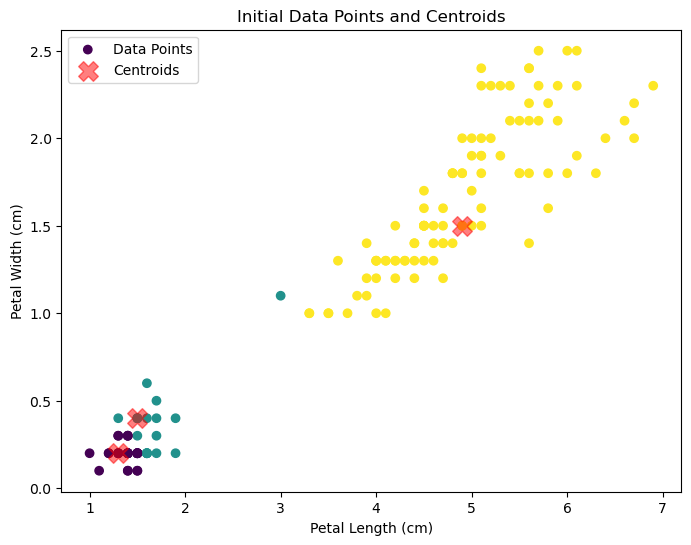

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    """
    Randomly initialize centroids from the dataset.
    """
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def k_means_init(data, k):
    """
    Initialize the K-means clustering process.
    """
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    # Initial assignment of points to centroids
    cluster_assignment = assign_clusters(data, centroids)
    
    return centroids, cluster_assignment

# Use the 'Petal.Length' and 'Petal.Width' for clustering
data_points = iris_data[['Petal.Length', 'Petal.Width']].values

# Number of clusters
k = 3

# Initialize the K-means process
initial_centroids, initial_clusters = k_means_init(data_points, k)

# Plot the data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=initial_clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids')
plt.title('Initial Data Points and Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


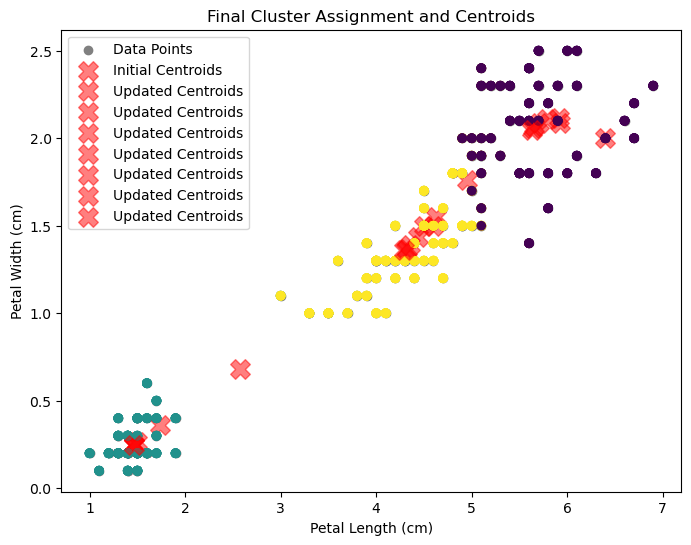

In [ ]:
def update_centroids(data, cluster_assignment, k):
    """
    Recompute the centroids based on current cluster assignments.
    """
    new_centroids = np.array([data[cluster_assignment == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means_algorithm(data, k, max_iterations=100, tol=1e-4):
    """
    Full implementation of the K-means clustering algorithm with visualization.
    """
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    # Plot initial centroids
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c='gray', marker='o', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Initial Centroids')
    
    for i in range(max_iterations):
        # Assign points to the nearest centroid
        clusters = assign_clusters(data, centroids)
        
        # Calculate new centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence (if centroids do not change)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
        
        # Plotting each step
        plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Updated Centroids')
    
    plt.title('Final Cluster Assignment and Centroids')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.show()
    
    return centroids, clusters

# Applying the full K-means algorithm to the Iris dataset
final_centroids, final_clusters = k_means_algorithm(data_points, k)


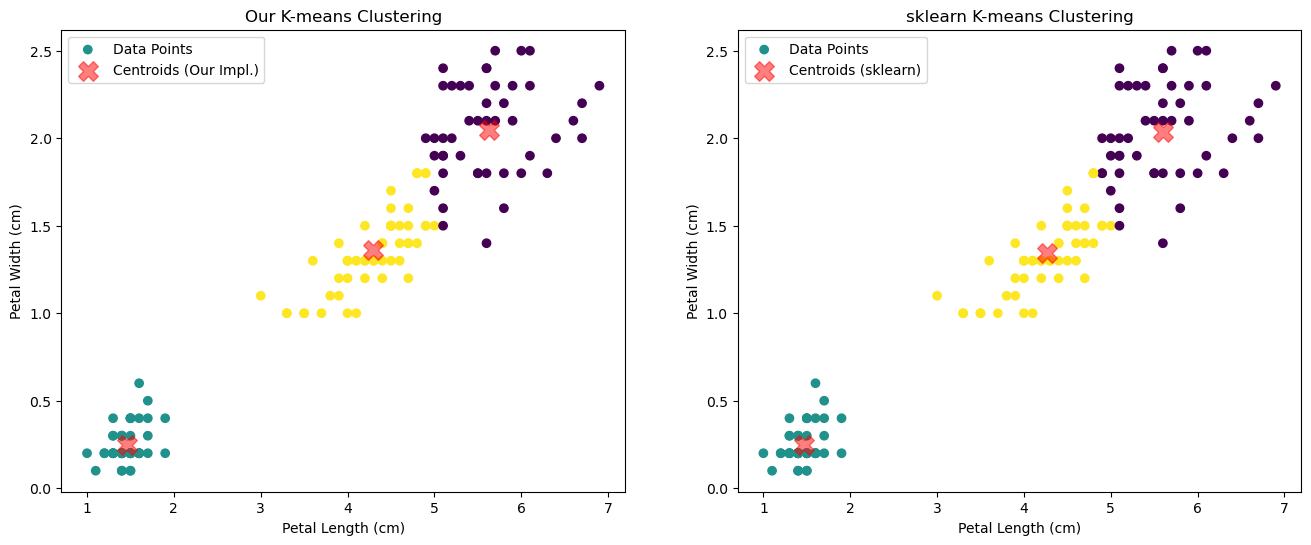

In [ ]:
from sklearn.cluster import KMeans

# Using sklearn's KMeans to perform clustering
sklearn_kmeans = KMeans(n_clusters=k, random_state=42)
sklearn_kmeans.fit(data_points)

# Centroids and labels from sklearn's implementation
sklearn_centroids = sklearn_kmeans.cluster_centers_
sklearn_labels = sklearn_kmeans.labels_

# Plotting the results from our implementation and sklearn's implementation for comparison
plt.figure(figsize=(16, 6))

# Our implementation
plt.subplot(1, 2, 1)
plt.scatter(data_points[:, 0], data_points[:, 1], c=final_clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids (Our Impl.)')
plt.title('Our K-means Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# sklearn implementation
plt.subplot(1, 2, 2)
plt.scatter(data_points[:, 0], data_points[:, 1], c=sklearn_labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids (sklearn)')
plt.title('sklearn K-means Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()


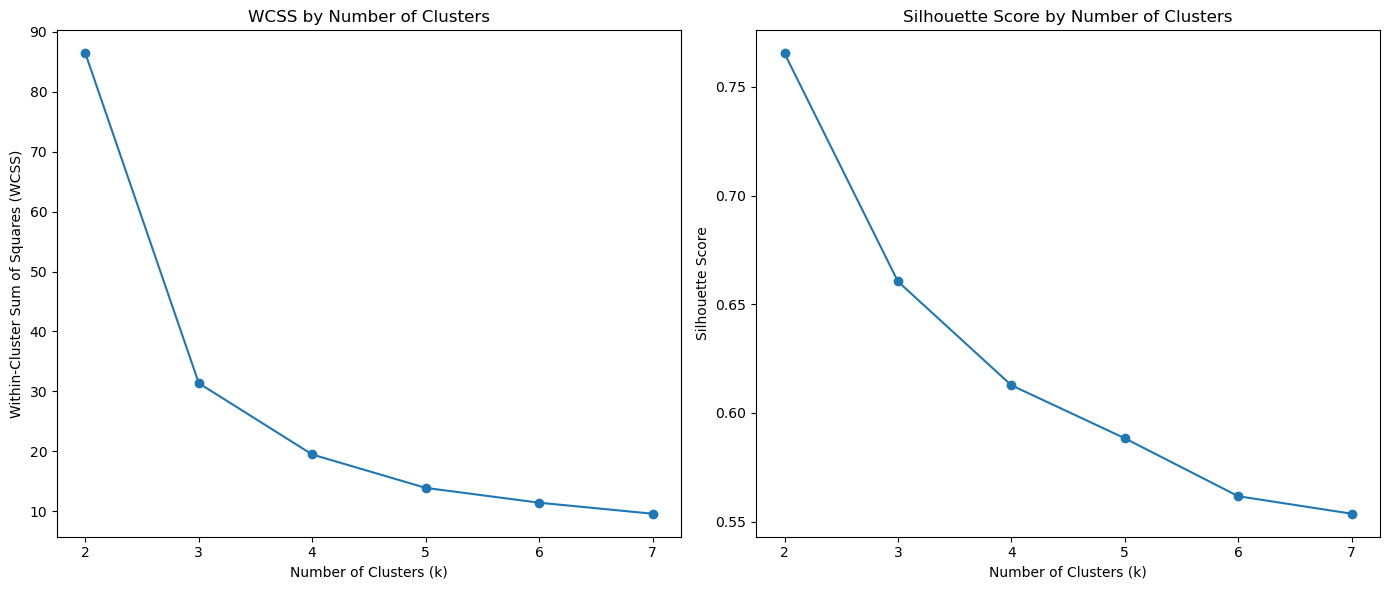

In [ ]:
from sklearn.metrics import silhouette_score

def clustering_metrics(data, k_range):
    wcss = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        
        # WCSS (within-cluster sum of squares)
        wcss.append(kmeans.inertia_)
        
        # Silhouette Score (only for k > 1 to avoid error)
        if k > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
    
    return wcss, silhouette_scores

# Setting the range of k
k_values = list(range(2, 8))

# Calculating metrics for the Iris dataset
iris_data_points = iris_data[['Petal.Length', 'Petal.Width']].values  # Assuming iris_data is pre-loaded DataFrame
iris_wcss, iris_silhouette = clustering_metrics(iris_data_points, k_values)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, iris_wcss, marker='o')
plt.title('WCSS by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(k_values, iris_silhouette, marker='o')  # Corrected to use k_values that align with the silhouette scores
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
iris_data.nunique()

Sepal.Length    35
Sepal.Width     23
Petal.Length    43
Petal.Width     22
Species          3
dtype: int64